In [ ]:
#%%

# https://mhptrading.com/docs/index.htm?context=90
#

In [ ]:
#%%

import quantstats        as qs
import yfinance          as yf
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

pd.options.mode.copy_on_write = True

In [ ]:
#%%

df = yf.download("SPY", start="1992-01-01", interval="1d", actions=True)

df['Open'     ] = df['Open'     ].round(4)
df['High'     ] = df['High'     ].round(4)
df['Low'      ] = df['Low'      ].round(4)
df['Close'    ] = df['Close'    ].round(4)
df['Adj Close'] = df['Adj Close'].round(4)

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,,
1993-01-29,43.9688,43.9688,43.7500,43.9375,24.7637,1003200,0.0,0.0,0.0
1993-02-01,43.9688,44.2500,43.9688,44.2500,24.9399,480500,0.0,0.0,0.0
1993-02-02,44.2188,44.3750,44.1250,44.3438,24.9927,201300,0.0,0.0,0.0
1993-02-03,44.4062,44.8438,44.3750,44.8125,25.2569,529400,0.0,0.0,0.0
1993-02-04,44.9688,45.0938,44.4688,45.0000,25.3626,531500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-04-03,517.7200,520.9500,517.6700,519.4100,519.4100,59155800,0.0,0.0,0.0
2024-04-04,523.5200,523.8700,512.7600,513.0700,513.0700,96858100,0.0,0.0,0.0
2024-04-05,514.4600,520.4400,514.0100,518.4300,518.4300,74482100,0.0,0.0,0.0


In [ ]:
#%%

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7854 entries, 1993-01-29 to 2024-04-09
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           7854 non-null   float64
 1   High           7854 non-null   float64
 2   Low            7854 non-null   float64
 3   Close          7854 non-null   float64
 4   Adj Close      7854 non-null   float64
 5   Volume         7854 non-null   int64  
 6   Dividends      7854 non-null   float64
 7   Stock Splits   7854 non-null   float64
 8   Capital Gains  7854 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 613.6 KB


In [ ]:
#%%

df[df['Dividends']>0]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,,
1993-03-19,45.2812,45.2812,45.0312,45.0312,25.5001,66900,0.213,0.0,0.0
1993-06-18,44.8438,44.8438,44.5000,44.5000,25.3778,58500,0.318,0.0,0.0
1993-09-17,45.8750,45.9062,45.7500,45.8125,26.2891,200900,0.286,0.0,0.0
1993-12-17,46.4062,46.5938,46.3750,46.5625,26.9024,104700,0.317,0.0,0.0
1994-03-18,46.7500,47.0312,46.7188,46.9688,27.2937,365500,0.271,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2023-03-17,393.2200,394.4000,388.5500,389.9900,384.4231,140553400,1.506,0.0,0.0
2023-06-16,443.0200,443.6100,438.9700,439.4600,434.7961,114121300,1.638,0.0,0.0
2023-09-15,447.1400,447.4800,442.9200,443.3700,440.2119,111761400,1.583,0.0,0.0


In [ ]:
#%%

df[df['Stock Splits']>0]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,,


In [ ]:
#%%

# Strategy 

df['FillPrice'] = df['Open' ].shift(-1)
df['Date'     ] = df.index
df['DateIn'   ] = df['Date' ].shift(-1)
df['DateOut'  ] = df['Date' ].shift(-1)

df.fillna(method='ffill', inplace=True)


df['EntrySetup'] = 0
df['ExitRule'  ] = 0

df['MaFast'] = df['Close'].rolling( 50).mean()
df['MaSlow'] = df['Close'].rolling(200).mean()

df.dropna(inplace=True)


df.loc[((df['MaFast']>df['MaSlow']) & (df['MaFast'].shift(1)<=df['MaSlow'].shift(1))), 'EntrySetup'] = 1
df.loc[((df['MaFast']<df['MaSlow']) & (df['MaFast'].shift(1)>=df['MaSlow'].shift(1))), 'ExitRule'  ] = 1

df.loc[df.index[ 0], 'EntrySetup'] = 1
df.loc[df.index[-1], 'ExitRule'  ] = 1

df

<ipython-input-7-834b8c74befc>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Capital Gains,FillPrice,Date,DateIn,DateOut,EntrySetup,ExitRule,MaFast,MaSlow
Date,,,,,,,,,,,,,,,,,
1993-11-11,46.5000,46.6250,46.3438,46.3750,26.6119,88900,0.0,0.0,0.0,46.4688,1993-11-11,1993-11-12,1993-11-12,1,0,46.269374,45.205939
1993-11-12,46.4688,46.7500,46.4375,46.5938,26.7374,108200,0.0,0.0,0.0,46.6875,1993-11-12,1993-11-15,1993-11-15,0,0,46.274374,45.219220
1993-11-15,46.6875,46.6875,46.4375,46.5625,26.7195,243300,0.0,0.0,0.0,46.6562,1993-11-15,1993-11-16,1993-11-16,0,0,46.278124,45.230783
1993-11-16,46.6562,46.8125,46.4688,46.7812,26.8450,492600,0.0,0.0,0.0,46.8125,1993-11-16,1993-11-17,1993-11-17,0,0,46.292498,45.242970
1993-11-17,46.8125,46.8125,46.4062,46.5312,26.7015,39600,0.0,0.0,0.0,46.4688,1993-11-17,1993-11-18,1993-11-18,0,0,46.304998,45.251563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-03,517.7200,520.9500,517.6700,519.4100,519.4100,59155800,0.0,0.0,0.0,523.5200,2024-04-03,2024-04-04,2024-04-04,0,0,505.705400,461.904750
2024-04-04,523.5200,523.8700,512.7600,513.0700,513.0700,96858100,0.0,0.0,0.0,514.4600,2024-04-04,2024-04-05,2024-04-05,0,0,506.269600,462.272800
2024-04-05,514.4600,520.4400,514.0100,518.4300,518.4300,74482100,0.0,0.0,0.0,519.1500,2024-04-05,2024-04-08,2024-04-08,0,0,506.930400,462.679050


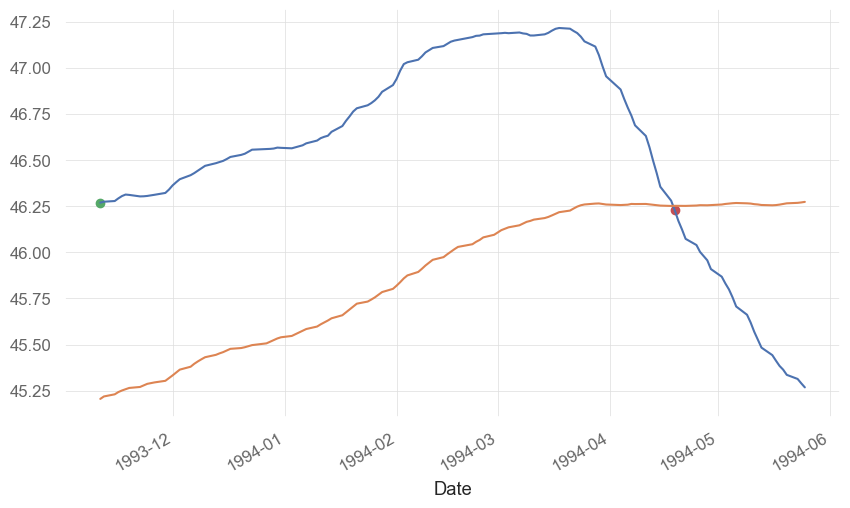

In [ ]:
#%%

#plot_df = df.iloc[-1000:-400]
plot_df = df["1993-06-11":"1994-05-25"]
plot_df[['MaFast', 'MaSlow']].plot(legend=False)

plt.scatter(plot_df[plot_df['EntrySetup']==1].index, plot_df[plot_df['EntrySetup']==1]['MaFast'], c='g')
plt.scatter(plot_df[plot_df['ExitRule'  ]==1].index, plot_df[plot_df['ExitRule'  ]==1]['MaFast'], c='r')

plt.show();

In [ ]:
#%%

# Position tracking

in_position      = False
date_in          = None
entry_fill_price = 0
date_out         = None
exit_fill_price  = 0

position_history = []

for index, row in df.iterrows():
    # EntrySetup
    if row['EntrySetup'] == 1:
        date_in          = row['DateIn'   ]
        entry_fill_price = row['FillPrice']
    # ExitRuel
    if row['ExitRule'  ] == 1:
        date_out        = row['DateOut'  ]
        exit_fill_price = row['FillPrice']
        pct_change      = (exit_fill_price - entry_fill_price)/entry_fill_price
        bars            = len(df[date_in:date_out])-1
        position_history.append((
            date_in, 
            date_out, 
            entry_fill_price, 
            exit_fill_price, 
            pct_change,
            bars
            ))

position_df = pd.DataFrame(position_history, columns=['DateIn', 'DateOut', 'PriceIn', 'PriceOut', 'Return', 'Bars'])
position_df = position_df.set_index(pd.DatetimeIndex(position_df['DateIn']))


position_df

,DateIn,DateOut,PriceIn,PriceOut,Return,Bars
DateIn,,,,,,
1993-11-12,1993-11-12,1994-04-20,46.4688,44.4062,-0.044387,109
1994-09-15,1994-09-15,1998-09-30,47.1719,103.5000,1.194103,1021
1998-12-09,1998-12-09,1999-11-05,118.6875,138.6250,0.167983,229
1999-11-12,1999-11-12,2000-10-31,139.2500,141.0156,0.012679,244
2003-05-16,2003-05-16,2004-08-19,94.8900,109.8100,0.157235,317
2004-11-08,2004-11-08,2006-07-20,116.9800,126.1200,0.078133,427
2006-09-12,2006-09-12,2007-12-24,130.5600,148.8200,0.139859,323
2009-06-24,2009-06-24,2010-07-07,90.1600,103.1300,0.143855,260
2010-10-25,2010-10-25,2011-08-15,119.1400,119.1900,0.000420,203


<Axes: xlabel='Date'>

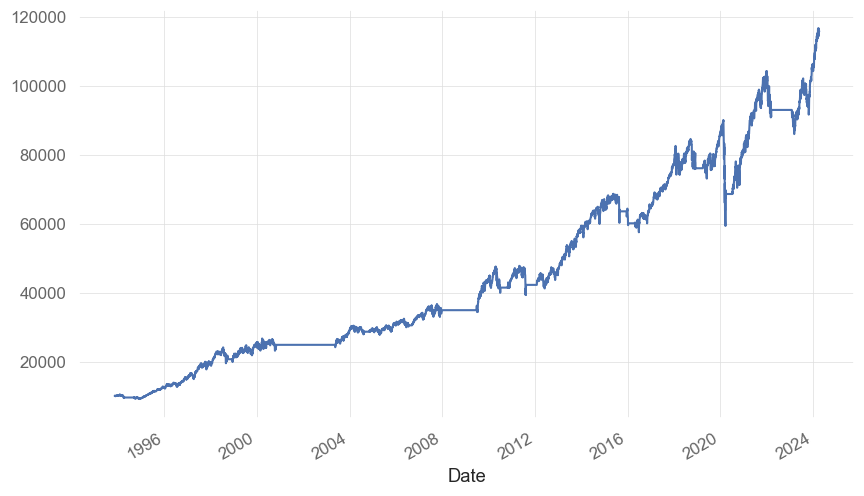

In [ ]:
#%%

# Tracking capital based on order

initial_capital = 10000.0

df['Return'] = df['Close'].pct_change()

df['StratReturn'] = 0.0
for index, row in position_df.iterrows():
    sub_df = df[row['DateIn']:row['DateOut']]["Return"]
    df.loc[sub_df.index, 'StratReturn'] = sub_df


df['GrowthFactor'] = (1 + df['StratReturn']).cumprod()
df['Equity'      ] = initial_capital*df['GrowthFactor']

df['Equity'].plot()

In [ ]:
#%%

print(f"Initial equity : {initial_capital}")
print(f"Final equity   : {round(df.iloc[-1]['Equity'], 2)}")

Initial equity : 10000.0
Final equity   : 115877.02
